In [16]:
import pandas as pd
import os

# 定義嵌入類型的分類字典
embedding_types = {
    'fasttext': [],
    'glove': [],
    'word2vec': []
}

best_individuals = {
    'fasttext': [],
    'glove': [],
    'word2vec': []
}

# 讀取文件並分類
file_dir = 'simple_gp_results'  # 請根據實際情況修改路徑
best_ind_fit = 0
best_ind = None

for filename in os.listdir(file_dir):
    if filename.endswith('.csv') and not filename.startswith('.DS_Store'):
        file_path = os.path.join(file_dir, filename)
        #print(f"Reading file: {file_path}")

        data = pd.read_csv(file_path)

        if '-e*fasttext*' in filename:
            embedding_type = 'fasttext'
            if not data.empty:
                last_eval = data.iloc[-1]  # 取得最後一筆記錄
                if last_eval['max'] > best_ind_fit: # 取得最佳個體
                    best_ind = last_eval['best_individual']  # 假設最佳個體在 'best_individual' 列中，根據實際情況修改
                    best_ind_fit = last_eval['max']
                    best_individuals[embedding_type]=[(filename, best_ind_fit, best_ind)]

        elif '-e*glove*' in filename:
            embedding_type = 'glove'
            if not data.empty:
                last_eval = data.iloc[-1]  # 取得最後一筆記錄
                if last_eval['max'] > best_ind_fit: # 取得最佳個體
                    best_ind = last_eval['best_individual']  # 假設最佳個體在 'best_individual' 列中，根據實際情況修改
                    best_ind_fit = last_eval['max']
                    best_individuals[embedding_type]=[(filename, best_ind_fit, best_ind)]

        elif '-e*word2vec*' in filename:
            embedding_type = 'word2vec'
            if not data.empty:
                last_eval = data.iloc[-1]  # 取得最後一筆記錄
                if last_eval['max'] > best_ind_fit: # 取得最佳個體
                    best_ind = last_eval['best_individual']  # 假設最佳個體在 'best_individual' 列中，根據實際情況修改
                    best_ind_fit = last_eval['max']
                    best_individuals[embedding_type]=[(filename, best_ind_fit, best_ind)]
        else:
            continue



for types in best_individuals:
    print(types)
    print(best_individuals[types])

# max_individuals = {}
# for emb_type, records in best_individuals.items():
#     if records:
#         # 找出fitness值最高的記錄
#         best_record = max(records, key=lambda x: x[1])
#         max_individuals[emb_type] = best_record

# print(max_individuals)

# max_individuals = {}
# for emb_type, records in best_individuals.items():
#     print(f"\nEmbedding Type: {emb_type}")
#     for record in records:
#         print(f"File: {record[0]}, Best Individual: {record[1]}")


# # 檢查分類後的數據
# for emb_type, datasets in embedding_types.items():
#     print(f"\nEmbedding Type: {emb_type}")
#     for i, dataset in enumerate(datasets):
#         print(f"Dataset {i+1} shape: {dataset.shape}")
#         print(dataset.head())


fasttext
[('-algo*simple_gp*-e*fasttext*-n*10*-p*500*-pc*1.0*-pm*0.0*-g*500*-c*1*-eval*20000*-run*2.csv', 0.8201157304735031, 'add(add(add(a, c), add(add(add(add(add(e, e), c), d), e), e)), add(add(d, add(b, add(add(add(b, add(a, c)), add(add(add(d, add(add(e, b), add(add(add(add(add(b, add(add(e, e), c)), c), d), add(add(add(b, e), d), add(add(add(add(d, add(e, c)), protected_sqrt(d)), e), a))), a))), e), a)), d))), a))')]
glove
[('-algo*simple_gp*-e*glove*-n*10*-p*500*-pc*1.0*-pm*0.0*-g*500*-c*1*-eval*20000*-run*10.csv', 0.5764702216693458, 'add(add(e, add(add(c, add(add(add(add(c, e), add(add(d, e), add(c, e))), b), add(add(e, add(add(e, add(add(e, add(add(d, e), add(e, add(b, add(e, add(add(c, add(b, add(add(e, b), c))), add(a, add(e, add(a, d))))))))), c)), add(e, add(a, add(e, d))))), a))), add(d, add(add(e, add(add(add(e, add(add(add(add(add(c, e), add(add(d, e), add(c, e))), b), add(add(e, add(add(e, add(add(e, add(add(d, e), add(e, add(b, add(e, add(add(c, add(b, add(add(e, b)

In [ ]:
import deap.gp as gp
import numpy as np
from deap import creator, base, tools

# Your other imports and code

best_records = [('fasttext',0.819969677554395,'add(e, add(d, add(c, add(add(e, a), b))))'), ('Glove', 0.574898279866091, 'add(add(add(e, add(a, a)), e), add(add(subtract(d, a), add(e, b)), c))'),('word2vec', 0.510411650871976,'add(add(add(add(b, a), add(e, c)), a), d)')]


def register(self):
        # Function set
        self.pset = gp.PrimitiveSet("MAIN", 5)
        self.pset.addPrimitive(np.add, 2)
        self.pset.addPrimitive(np.subtract, 2)
        self.pset.addPrimitive(np.multiply, 2)
        self.pset.addPrimitive(protected_div, 2)
        self.pset.addPrimitive(protected_sqrt, 1)
        self.pset.addPrimitive(np.square, 1)

        # Terminal set
        self.pset.renameArguments(ARG0="a", ARG1="b", ARG2="c", ARG3="d", ARG4="e")

        # Create the fitness and individual classes
        creator.create("FitnessMax", base.Fitness, weights=(1,))
        creator.create(
            "Individual", gp.PrimitiveTree, fitness=creator.FitnessMax, pset=self.pset
        )

        # Initialize the toolbox
        self.toolbox = base.Toolbox()
        self.toolbox.register("expr", gp.genHalfAndHalf, pset=self.pset, min_=1, max_=5)
        self.toolbox.register(
            "individual", tools.initIterate, creator.Individual, self.toolbox.expr
        )
        self.toolbox.register(
            "population",
            tools.initRepeat,
            list,
            self.toolbox.individual,
            n=self.pop_size,
        )

def test():
    # Your setup code

    for line in best_records:

        # Ensure `line[2]` contains the expression as a string
        expression = line[2]

        gp.register()  # Register the primitives and other setup


        # Create a PrimitiveTree from the string expression
        individual = gp.PrimitiveTree.from_string(expression, pset)
        print(individual)

# Example add, subtract, protected_sqrt functions
def protected_div(x, y):
    mask = y == 0
    safe_y = np.where(mask, 1, y)
    return np.where(mask, 1, x / safe_y)


def protected_sqrt(x):
    x = np.abs(x)
    return np.sqrt(x)

if __name__ == "__main__":
    test()

chatgpt改過

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Lib

{'fasttext': array([0.7754448 , 0.8338668 , 0.80151904, 0.81727487, 0.8607103 ,
       0.81267005, 0.8142286 , 0.7755783 , 0.82194936, 0.81676704,
       0.7963427 , 0.8388663 , 0.8457088 , 0.82794374, 0.7858663 ,
       0.8582451 , 0.84883225, 0.8321646 , 0.82747334, 0.8331051 ,
       0.8437226 , 0.8221673 , 0.80921113, 0.8072836 , 0.82648015,
       0.84035534, 0.814492  , 0.80923116, 0.8170277 , 0.82188094,
       0.7905404 , 0.7995852 , 0.8232107 , 0.82536566, 0.78196144,
       0.83533245, 0.8235348 , 0.78928196, 0.8047911 , 0.8229508 ,
       0.8398872 , 0.8263859 , 0.8407028 , 0.8377369 , 0.8353598 ,
       0.8158313 , 0.81727177, 0.8072458 , 0.84468484, 0.80545586,
       0.81955177, 0.8114302 , 0.8522516 , 0.823805  , 0.8342432 ,
       0.82744086, 0.82839906, 0.80558586, 0.8589801 , 0.8038386 ,
       0.8121128 , 0.836129  , 0.8359384 , 0.8262933 , 0.82778054,
       0.84180284, 0.8346533 , 0.8188975 , 0.8052689 , 0.8323589 ,
       0.8261014 , 0.81254196, 0.8123259 , 0.7997

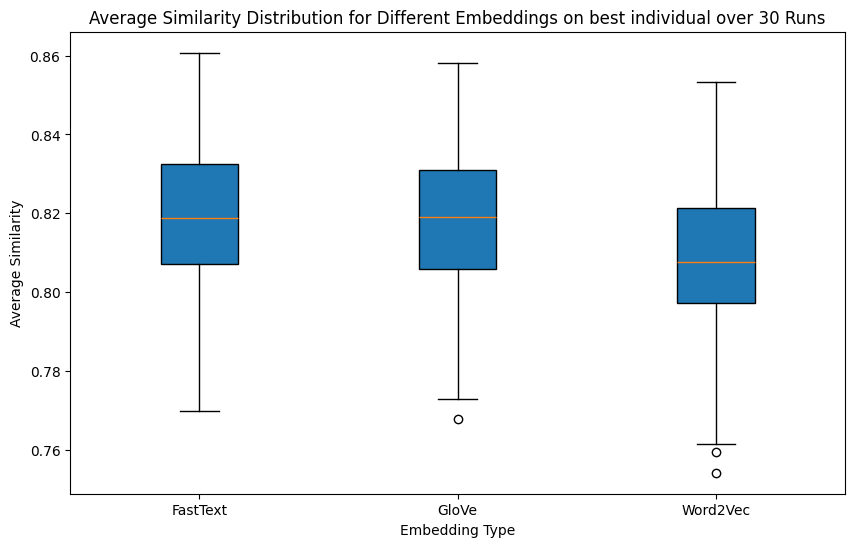

In [85]:
import deap.gp as gp
import numpy as np
from deap import creator, base, tools
from data import get_testing_embeddings
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

best_records = [
    ('fasttext', 0.819969677554395, 'add(e, add(d, add(c, add(add(e, a), b))))'),
    ('glove', 0.574898279866091, 'add(add(add(e, add(a, a)), e), add(add(subtract(d, a), add(e, b)), c))'),
    ('word2vec', 0.510411650871976, 'add(add(add(add(b, a), add(e, c)), a), d)')
]

# Register the primitives, terminals, and other setup
def register():
    # Create the primitive set
    pset = gp.PrimitiveSet("MAIN", 5)
    pset.addPrimitive(np.add, 2)
    pset.addPrimitive(np.subtract, 2)
    pset.addPrimitive(np.multiply, 2)
    pset.addPrimitive(protected_div, 2)
    pset.addPrimitive(protected_sqrt, 1)
    pset.addPrimitive(np.square, 1)

    # Terminal set
    pset.renameArguments(ARG0="a", ARG1="b", ARG2="c", ARG3="d", ARG4="e")

    # Create the fitness and individual classes
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax, pset=pset)

    # Initialize the toolbox
    toolbox = base.Toolbox()
    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=5)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    return pset, toolbox

def run_test_once():
    # Register the setup
    pset, toolbox = register()

    data, embeddings, embedding_model = get_testing_embeddings("fasttext", 10)

    records = []

    for line in best_records:
        # Ensure `line[2]` contains the expression as a string
        expression = line[2]

        # Create a PrimitiveTree from the string expression
        individual = gp.PrimitiveTree.from_string(expression, pset)
        fit = eval_individual(individual, data, embedding_model, pset)
        type_ = line[0]
        records.append((type_, fit, expression))

    # for line in records:
    #     print(line)
    #print(records)

    return records

# def plot_results(records):
#     # 將資料放入一個列表
#     data = [records[0][1], records[1][1], records[2][1]]

#     # 設定x軸標籤
#     labels = [records[0][0], records[1][0], records[2][0]]

#     # 畫boxplot
#     plt.figure(figsize=(10, 6))
#     plt.boxplot(data, labels=labels, patch_artist=True)

#     # 添加標題和標籤
#     plt.title('Similarity Distribution for Different Embeddings')
#     plt.xlabel('Embedding Type')
#     plt.ylabel('Similarity')

#     # 顯示圖表
#     plt.show()

def plot_results(records):
    # 將資料放入一個列表
    data = [records['fasttext'], records['glove'], records['word2vec']]

    # 設定x軸標籤
    labels = ['FastText', 'GloVe', 'Word2Vec']

    # 畫boxplot
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=labels, patch_artist=True)

    # 添加標題和標籤
    plt.title('Average Similarity Distribution for Different Embeddings on best individual over 30 Runs')
    plt.xlabel('Embedding Type')
    plt.ylabel('Average Similarity')

    # 顯示圖表
    plt.show()

# def test():
#     sum = []
#     for i in range(3):
#         print(f"{i} times")
#         records = run_test_once()
#         for type in records:
#             print(type[0])
#             print(type[1])
#         np.add(sum[type[1]][i],type[1])

#     print(sum)



#     for i in range(3):  # Assuming there are 3 types
#         type_ = best_records[i][0]

#         #avg_results[type_] = [all_records[j][i][1] for j in range(3)]
#         #combined_results = [all_records[j][i][1] for j in range(30)]
#         #avg_results[type_] = np.mean(combined_results, axis=0)
#         print(type_)

#     return #avg_results

def test():
    num_runs = 30  # Number of runs
    all_records = {'fasttext': [], 'glove': [], 'word2vec': []}

    for _ in range(num_runs):
        records = run_test_once()
        for record in records:
            type_ = record[0]
            all_records[type_].append(record[1])

    # Calculate average similarity for each type
    avg_results = {}
    for key, value in all_records.items():
        avg_results[key] = np.mean(value, axis=0)

    print(avg_results)

    return avg_results


# Example add, subtract, protected_sqrt functions
def protected_div(x, y):
    mask = y == 0
    safe_y = np.where(mask, 1, y)
    return np.where(mask, 1, x / safe_y)

def protected_sqrt(x):
    x = np.abs(x)
    return np.sqrt(x)

def clean_data(data):
        data = np.where(np.isinf(data), np.finfo(np.float32).max, data)
        data = np.nan_to_num(data, nan=0.0)
        return data

def eval_individual(individual, data, embeddings, pset):
    inputword_ = data[0].str.split(" ").apply(lambda x: x[:5])
    realword_ = data[0].str.split(" ").str.get(5)
    func = gp.compile(individual, pset)
    similarity_ = []
    #print("Start evaluating...")
    for data_index in range(len(inputword_)):
        words = inputword_.iloc[data_index]
        in_vectors = [embeddings[word] for word in words]
        a, b, c, d, e = in_vectors[:5]
        y = realword_.iloc[data_index]
        out_vector = embeddings[y]
        predict = clean_data(func(a, b, c, d, e))
        similarity_.append(cosine_similarity([predict], [out_vector])[0][0])
    return similarity_

if __name__ == "__main__":
    records=test()
    plot_results(records)


In [27]:
import matplotlib.pyplot as plt

def plot_results(records):
    # 將資料放入一個列表
    data = [records[0][1], records[1][1], records[2][1]]

    # 設定x軸標籤
    labels = [records[0][0], records[1][0], records[2][0]]

    # 畫boxplot
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=labels, patch_artist=True)

    # 添加標題和標籤
    plt.title('Similarity Distribution for Different Embeddings')
    plt.xlabel('Embedding Type')
    plt.ylabel('Similarity')

    # 顯示圖表
    plt.show()
# # 將資料放入一個列表
# data__ = [records[0][1], records[1][1], records[2][1]]

# # 設定x軸標籤
# labels = ['FastText', 'GloVe', 'Word2Vec']

# # 畫boxplot
# plt.figure(figsize=(10, 6))
# plt.boxplot(data, labels=labels, patch_artist=True)

# # 添加標題和標籤
# plt.title('Similarity Distribution for Different Embeddings')
# plt.xlabel('Embedding Type')
# plt.ylabel('Similarity')

# # 顯示圖表
# plt.show()

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import os

cur_path = os.getcwd()
print(cur_path)

# 保存所有运行结果的列表
all_avg_values = []

# 读取 30 个文件并存储所有的 avg fiteness value 列
for run in range(1, 31):  # 假设文件命名从 run=1 到 run=30
    file_path = f"{cur_path}/archive/rf/result/result.-algo*rf*-e*fasttext*-n*10*-p*10*-pc*1.0*-pm*0.1*-g*500*-c*0*-eval*100*-run*{run}.csv"
    data = pd.read_csv(file_path)
    all_avg_values.append(data['avg fiteness value'])

# 将所有 avg fiteness value 列合并成一个 DataFrame
all_avg_values_df = pd.concat(all_avg_values, axis=1)

# 对每个数据点的所有运行结果计算平均值
avg_values_mean = all_avg_values_df.mean(axis=1)
print(avg_values_mean)


all_avg_values_word2vec = []
# 读取 30 个文件并存储所有的 avg fiteness value 列
for run in range(1, 31):  # 假设文件命名从 run=1 到 run=30
    file_path = f"{cur_path}/archive/rf/result/result.-algo*rf*-e*word2vec*-n*10*-p*10*-pc*1.0*-pm*0.1*-g*500*-c*0*-eval*100*-run*{run}.csv"
    data = pd.read_csv(file_path)
    all_avg_values_word2vec.append(data['avg fiteness value'])

# 将所有 avg fiteness value 列合并成一个 DataFrame
all_avg_values_word2vec_df = pd.concat(all_avg_values_word2vec, axis=1)

# 对每个数据点的所有运行结果计算平均值
avg_values_mean_word2vec = all_avg_values_word2vec_df.mean(axis=1)

# 输出结果
print(avg_values_mean_word2vec)

all_avg_values_glove = []
for run in range(1, 31):  # 假设文件命名从 run=1 到 run=30
    file_path = f"{cur_path}/archive/rf/result/result.-algo*rf*-e*glove*-n*10*-p*10*-pc*1.0*-pm*0.1*-g*500*-c*0*-eval*100*-run*{run}.csv"
    data = pd.read_csv(file_path)
    all_avg_values_glove.append(data['avg fiteness value'])
all_avg_values_glove_df = pd.concat(all_avg_values_glove, axis=1)
avg_values_mean_glove = all_avg_values_glove_df.mean(axis=1)
print(avg_values_mean_glove)

# # 如果你想将结果转换为 NumPy 数组
# avg_values_mean_array = avg_values_mean.to_numpy()

# # 绘制结果
# plt.figure(figsize=(10, 6))
# plt.plot(avg_values_mean_array, marker='o', linestyle='-', color='b')
# plt.xlabel('N-th Data Point')
# plt.ylabel('Avg Fitness Value')
# plt.title('Average Fitness Value Across 30 Runs')
# plt.grid(True)
# plt.show()


/Users/chenyujing/Desktop/yuching/nthu/grade1/2024ec/EC-term-paper
0       0.692432
1       0.832005
2       0.661466
3       0.709038
4       0.647444
          ...   
9995    0.754095
9996    0.579818
9997    0.720662
9998    0.678498
9999    0.656092
Length: 10000, dtype: float64
0       0.239813
1       0.384712
2       0.613410
3       0.399866
4       0.443774
          ...   
9995    0.407749
9996    0.080681
9997    0.407450
9998    0.358317
9999    0.684482
Length: 10000, dtype: float64
0       0.631645
1       0.738193
2       0.507134
3       0.286636
4       0.485630
          ...   
9995    0.673380
9996    0.269534
9997    0.235482
9998    0.305720
9999    0.518217
Length: 10000, dtype: float64


In [70]:
def plot_results(records):
    # 將資料放入一個列表
    data = [records['fasttext'], records['glove'], records['word2vec']]

    # 設定x軸標籤
    labels = ['FastText', 'GloVe', 'Word2Vec']

    # 畫boxplot
    plt.figure(figsize=(10, 6))
    plt.boxplot(data, labels=labels, patch_artist=True)

    # 添加標題和標籤
    plt.title('Average Similarity Distribution for Different Embeddings over 30 Runs')
    plt.xlabel('Embedding Type')
    plt.ylabel('Average Similarity')

    # 顯示圖表
    plt.show()


/Users/chenyujing/Desktop/yuching/nthu/grade1/2024ec/EC-term-paper
0       0.692432
1       0.832005
2       0.661466
3       0.709038
4       0.647444
          ...   
9995    0.754095
9996    0.579818
9997    0.720662
9998    0.678498
9999    0.656092
Length: 10000, dtype: float64
0       0.239813
1       0.384712
2       0.613410
3       0.399866
4       0.443774
          ...   
9995    0.407749
9996    0.080681
9997    0.407450
9998    0.358317
9999    0.684482
Length: 10000, dtype: float64
0       0.631645
1       0.738193
2       0.507134
3       0.286636
4       0.485630
          ...   
9995    0.673380
9996    0.269534
9997    0.235482
9998    0.305720
9999    0.518217
Length: 10000, dtype: float64


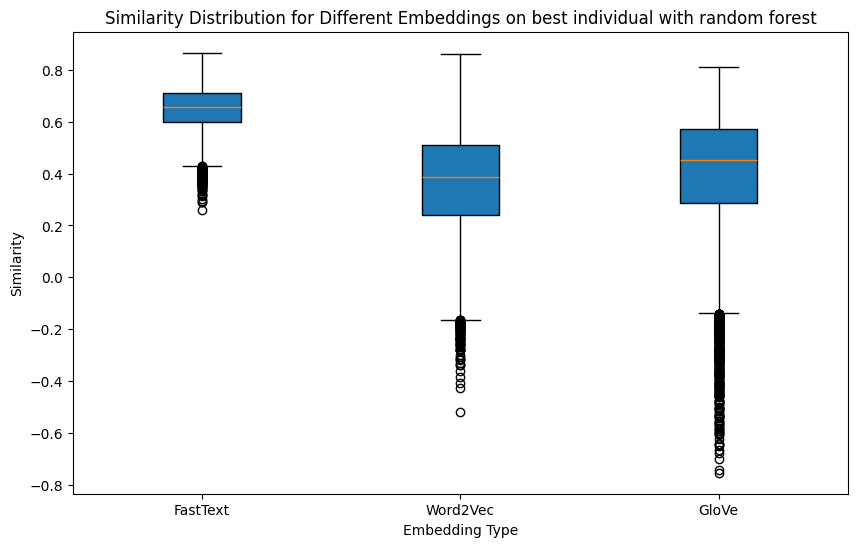

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import os

cur_path = os.getcwd()
print(cur_path)

# 保存所有运行结果的列表
all_avg_values_fasttext = []
all_avg_values_word2vec = []
all_avg_values_glove = []

# 读取 fasttext 30 个文件并存储所有的 avg fiteness value 列
for run in range(1, 31):  # 假设文件命名从 run=1 到 run=30
    file_path = f"{cur_path}/archive/rf/result/result.-algo*rf*-e*fasttext*-n*10*-p*10*-pc*1.0*-pm*0.1*-g*500*-c*0*-eval*100*-run*{run}.csv"
    data = pd.read_csv(file_path)
    all_avg_values_fasttext.append(data['avg fiteness value'])

# 将所有 avg fiteness value 列合并成一个 DataFrame
all_avg_values_fasttext_df = pd.concat(all_avg_values_fasttext, axis=1)

# 对每个数据点的所有运行结果计算平均值
avg_values_mean_fasttext = all_avg_values_fasttext_df.mean(axis=1)
print(avg_values_mean_fasttext)


# 读取 word2vec 30 个文件并存储所有的 avg fiteness value 列
for run in range(1, 31):  # 假设文件命名从 run=1 到 run=30
    file_path = f"{cur_path}/archive/rf/result/result.-algo*rf*-e*word2vec*-n*10*-p*10*-pc*1.0*-pm*0.1*-g*500*-c*0*-eval*100*-run*{run}.csv"
    data = pd.read_csv(file_path)
    all_avg_values_word2vec.append(data['avg fiteness value'])

# 将所有 avg fiteness value 列合并成一个 DataFrame
all_avg_values_word2vec_df = pd.concat(all_avg_values_word2vec, axis=1)

# 对每个数据点的所有运行结果计算平均值
avg_values_mean_word2vec = all_avg_values_word2vec_df.mean(axis=1)

# 输出结果
print(avg_values_mean_word2vec)


# 读取 glove 30 个文件并存储所有的 avg fiteness value 列
for run in range(1, 31):  # 假设文件命名从 run=1 到 run=30
    file_path = f"{cur_path}/archive/rf/result/result.-algo*rf*-e*glove*-n*10*-p*10*-pc*1.0*-pm*0.1*-g*500*-c*0*-eval*100*-run*{run}.csv"
    data = pd.read_csv(file_path)
    all_avg_values_glove.append(data['avg fiteness value'])

# 将所有 avg fiteness value 列合并成一个 DataFrame
all_avg_values_glove_df = pd.concat(all_avg_values_glove, axis=1)

# 对每个数据点的所有运行结果计算平均值
avg_values_mean_glove = all_avg_values_glove_df.mean(axis=1)
print(avg_values_mean_glove)


# 将三个 embedding 类型的平均值收集到一个列表中
data = [avg_values_mean_fasttext, avg_values_mean_word2vec, avg_values_mean_glove]

# 设置 x 轴标签
labels = ['FastText', 'Word2Vec', 'GloVe']

# 绘制 boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, patch_artist=True)

# 添加标题和标签
plt.title('Similarity Distribution for Different Embeddings on best individual with random forest')
plt.xlabel('Embedding Type')
plt.ylabel('Similarity')

# 显示图表
plt.show()


/Users/chenyujing/Desktop/yuching/nthu/grade1/2024ec/EC-term-paper
0       0.159861
1       0.393182
2       0.699009
3       0.508655
4       0.354974
          ...   
9995    0.461349
9996   -0.033581
9997    0.405885
9998    0.231387
9999    0.864126
Length: 10000, dtype: float64


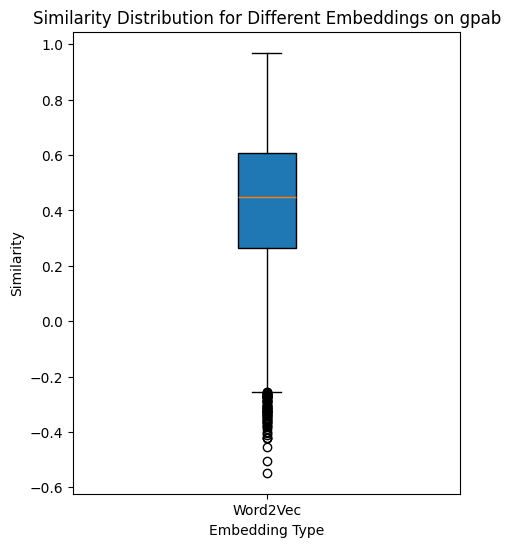

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import os

cur_path = os.getcwd()
print(cur_path)

# 保存所有运行结果的列表
all_avg_values_fasttext = []
all_avg_values_word2vec = []
all_avg_values_glove = []

# # 读取 fasttext 30 个文件并存储所有的 avg fiteness value 列
# for run in range(1, 31):  # 假设文件命名从 run=1 到 run=30
#     file_path = f"{cur_path}/archive/gpab/result/result.-algo*gpab*-e*fasttext*-n*10*-p*10*-pc*1.0*-pm*0.1*-g*500*-c*0*-eval*100*-run*{run}.csv"
#     data = pd.read_csv(file_path)
#     all_avg_values_fasttext.append(data['avg fiteness value'])

# # 将所有 avg fiteness value 列合并成一个 DataFrame
# all_avg_values_fasttext_df = pd.concat(all_avg_values_fasttext, axis=1)

# # 对每个数据点的所有运行结果计算平均值
# avg_values_mean_fasttext = all_avg_values_fasttext_df.mean(axis=1)
# print(avg_values_mean_fasttext)


# 读取 word2vec 30 个文件并存储所有的 avg fiteness value 列
for run in range(1, 4):  # 假设文件命名从 run=1 到 run=30
    file_path = f"{cur_path}/archive/gpab/result/result.-algo*gpab*-e*word2vec*-n*10*-p*10*-pc*1.0*-pm*0.1*-g*10*-c*0*-eval*1000*-run*{run}.csv"
    data = pd.read_csv(file_path)
    all_avg_values_word2vec.append(data['avg fiteness value'])

# 将所有 avg fiteness value 列合并成一个 DataFrame
all_avg_values_word2vec_df = pd.concat(all_avg_values_word2vec, axis=1)

# 对每个数据点的所有运行结果计算平均值
avg_values_mean_word2vec = all_avg_values_word2vec_df.mean(axis=1)

# 输出结果
print(avg_values_mean_word2vec)


# # 读取 glove 30 个文件并存储所有的 avg fiteness value 列
# for run in range(1, 4):  # 假设文件命名从 run=1 到 run=30
#     file_path = f"{cur_path}/archive/gpab/result/result.-algo*gpab*-e*glove*-n*10*-p*10*-pc*1.0*-pm*0.1*-g*500*-c*0*-eval*100*-run*{run}.csv"
#     data = pd.read_csv(file_path)
#     all_avg_values_glove.append(data['avg fiteness value'])

# # 将所有 avg fiteness value 列合并成一个 DataFrame
# all_avg_values_glove_df = pd.concat(all_avg_values_glove, axis=1)

# # 对每个数据点的所有运行结果计算平均值
# avg_values_mean_glove = all_avg_values_glove_df.mean(axis=1)
# print(avg_values_mean_glove)


# 将三个 embedding 类型的平均值收集到一个列表中
#data = [avg_values_mean_fasttext, avg_values_mean_word2vec, avg_values_mean_glove]

data = [avg_values_mean_word2vec]

# 设置 x 轴标签
labels = ['Word2Vec']

# 绘制 boxplot
plt.figure(figsize=(5, 6))
plt.boxplot(data, labels=labels, patch_artist=True)

# 添加标题和标签
plt.title('Similarity Distribution for Different Embeddings on gpab')
plt.xlabel('Embedding Type')
plt.ylabel('Similarity')

# 显示图表
plt.show()


# latest rf updated

/Users/chenyujing/Desktop/yuching/nthu/grade1/2024ec/EC-term-paper


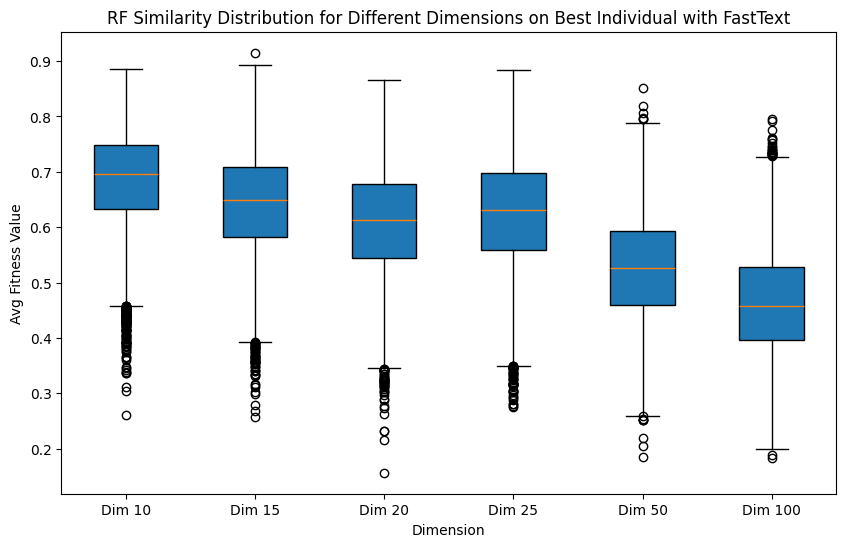

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import os

cur_path = os.getcwd()
print(cur_path)

# 保存所有运行结果的列表
dims = [10, 15, 20, 25, 50, 100]
dim_best_values = {dim: [] for dim in dims}

# 外层循环遍历不同的维度
for dim in dims:
    # 内层循环读取不同运行的数据
    for run in range(1, 31):  # 假设文件命名从 run=1 到 run=30
        file_path = f"{cur_path}/archive/rf/result/x/result.-algo*rf*-e*fasttext*-n*{dim}*-p*10*-pc*1.0*-pm*0.3*-g*500*-c*0*-eval*100*-run*{run}.csv"
        data = pd.read_csv(file_path, usecols=['avg fiteness value'])  # 只读取 avg fiteness value 列
        dim_best_values[dim].append(data['avg fiteness value'])

# 将每个维度的所有运行结果合并成一个 DataFrame，并计算每个数据点的所有运行结果的平均值
dim_best_avg = {dim: pd.concat(values, axis=1).mean(axis=1) for dim, values in dim_best_values.items()}

# 将不同维度的平均值收集到一个列表中
data = [dim_best_avg[dim] for dim in dims]

# 设置 x 轴标签
labels = [f'Dim {dim}' for dim in dims]

# 绘制 boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, patch_artist=True)

# 添加标题和标签
plt.title('RF Similarity Distribution for Different Dimensions on Best Individual with FastText')
plt.xlabel('Dimension')
plt.ylabel('Avg Fitness Value')

# 显示图表
plt.show()


Random forest for evaluation = 10,000

/home/nlplab/atwolin/EC/EC-term-paper
0       0.254104
1       0.516426
2       0.723545
3       0.537265
4       0.537733
          ...   
9995    0.367182
9996    0.243776
9997    0.506610
9998    0.588315
9999    0.941227
Length: 10000, dtype: float64


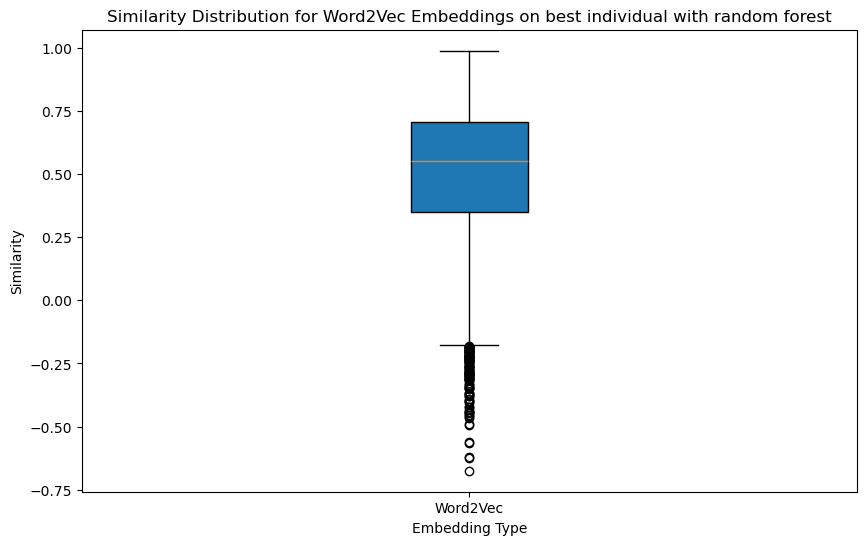

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

cur_path = os.getcwd()
print(cur_path)

# 保存所有运行结果的列表
# all_avg_values_fasttext = []
all_avg_values_word2vec = []
# all_avg_values_glove = []

# 读取 fasttext 30 个文件并存储所有的 avg fiteness value 列
# for run in range(1, 31):  # 假设文件命名从 run=1 到 run=30
#     file_path = f"{cur_path}/archive/rf/result/result.-algo*rf*-e*fasttext*-n*10*-p*10*-pc*1.0*-pm*0.1*-g*500*-c*0*-eval*100*-run*{run}.csv"
#     data = pd.read_csv(file_path)
#     all_avg_values_fasttext.append(data['avg fiteness value'])

# 将所有 avg fiteness value 列合并成一个 DataFrame
# all_avg_values_fasttext_df = pd.concat(all_avg_values_fasttext, axis=1)

# 对每个数据点的所有运行结果计算平均值
# avg_values_mean_fasttext = all_avg_values_fasttext_df.mean(axis=1)
# print(avg_values_mean_fasttext)


# 读取 word2vec 8 个文件并存储所有的 avg fiteness value 列
for run in range(1, 8):  # 假设文件命名从 run=1 到 run=30
    file_path = f"{cur_path}/archive/rf/result/result.-algo*rf*-e*word2vec*-n*10*-p*500*-pc*1.0*-pm*0.3*-g*500*-c*0*-eval*10000*-run*{run}.01"
    data = pd.read_csv(file_path)
    all_avg_values_word2vec.append(data['avg fiteness value'])

# 将所有 avg fiteness value 列合并成一个 DataFrame
all_avg_values_word2vec_df = pd.concat(all_avg_values_word2vec, axis=1)

# 对每个数据点的所有运行结果计算平均值
avg_values_mean_word2vec = all_avg_values_word2vec_df.mean(axis=1)

# 输出结果
print(avg_values_mean_word2vec)


# 读取 glove 30 个文件并存储所有的 avg fiteness value 列
# for run in range(1, 31):  # 假设文件命名从 run=1 到 run=30
#     file_path = f"{cur_path}/archive/rf/result/result.-algo*rf*-e*glove*-n*10*-p*10*-pc*1.0*-pm*0.1*-g*500*-c*0*-eval*100*-run*{run}.csv"
#     data = pd.read_csv(file_path)
#     all_avg_values_glove.append(data['avg fiteness value'])

# 将所有 avg fiteness value 列合并成一个 DataFrame
# all_avg_values_glove_df = pd.concat(all_avg_values_glove, axis=1)

# 对每个数据点的所有运行结果计算平均值
# avg_values_mean_glove = all_avg_values_glove_df.mean(axis=1)
# print(avg_values_mean_glove)


# 将三个 embedding 类型的平均值收集到一个列表中
# data = [avg_values_mean_fasttext, avg_values_mean_word2vec, avg_values_mean_glove]
data = [avg_values_mean_word2vec]

# 设置 x 轴标签
# labels = ['FastText', 'Word2Vec', 'GloVe']
labels = ['Word2Vec']

# 绘制 boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, patch_artist=True)

# 添加标题和标签
plt.title('Similarity Distribution for Word2Vec Embeddings on best individual with random forest')
plt.xlabel('Embedding Type')
plt.ylabel('Similarity')

# 显示图表
plt.show()


/home/nlplab/atwolin/EC/EC-term-paper
0       0.771625
1       0.943992
2       0.761067
3       0.760246
4       0.823501
          ...   
9995    0.974378
9996    0.508329
9997    0.837209
9998    0.838025
9999    0.909950
Length: 10000, dtype: float64
0       0.127323
1       0.384427
2       0.690142
3       0.487405
4       0.497819
          ...   
9995    0.528948
9996   -0.172996
9997    0.428373
9998    0.202067
9999    0.965355
Length: 10000, dtype: float64
0       0.703523
1       0.891419
2       0.647523
3       0.440231
4       0.574369
          ...   
9995    0.901979
9996   -0.140278
9997    0.413650
9998    0.516065
9999    0.652327
Length: 10000, dtype: float64


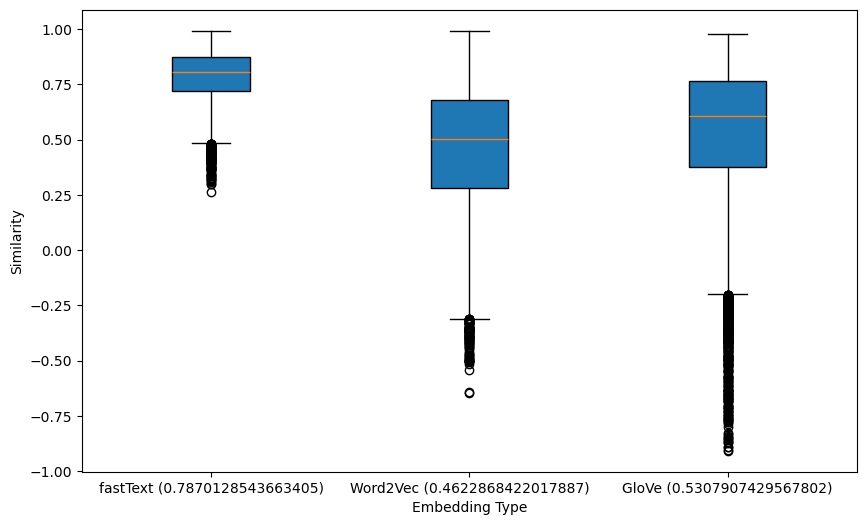

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

cur_path = os.getcwd()
print(cur_path)

# 保存所有运行结果的列表
all_avg_values_fasttext = []
all_avg_values_word2vec = []
all_avg_values_glove = []

# 读取 fasttext 30 个文件并存储所有的 avg fiteness value 列
for run in range(1, 2):  # 假设文件命名 run=1
    file_path = f"/home/nlplab/atwolin/EC/EC-term-paper/archive/gpab/result/result.-algo*gpab*-e*fasttext*-n*10*-p*100*-pc*1.0*-pm*0.1*-g*100*-c*0*-eval*1000*-run*1"
    data = pd.read_csv(file_path)
    all_avg_values_fasttext.append(data['avg fiteness value'])

# 将所有 avg fiteness value 列合并成一个 DataFrame
all_avg_values_fasttext_df = pd.concat(all_avg_values_fasttext, axis=1)

# 对每个数据点的所有运行结果计算平均值
avg_values_mean_fasttext = all_avg_values_fasttext_df.mean(axis=1)
print(avg_values_mean_fasttext)


# 读取 word2vec 8 个文件并存储所有的 avg fiteness value 列
# for run in range(1, 2):  # 假设文件命名 run=1
file_path = f"/home/nlplab/atwolin/EC/EC-term-paper/archive/gpab/result/result.-algo*gpab*-e*word2vec*-n*10*-p*100*-pc*1.0*-pm*0.1*-g*100*-c*0*-eval*1000*-run*1"
data = pd.read_csv(file_path)
all_avg_values_word2vec.append(data['avg fiteness value'])

# 将所有 avg fiteness value 列合并成一个 DataFrame
all_avg_values_word2vec_df = pd.concat(all_avg_values_word2vec, axis=1)

# 对每个数据点的所有运行结果计算平均值
avg_values_mean_word2vec = all_avg_values_word2vec_df.mean(axis=1)

# 输出结果
print(avg_values_mean_word2vec)


# 读取 glove 30 个文件并存储所有的 avg fiteness value 列
# for run in range(1, 2):  # 假设文件命名 run=1
file_path = f"/home/nlplab/atwolin/EC/EC-term-paper/archive/gpab/result/result.-algo*gpab*-e*glove*-n*10*-p*100*-pc*1.0*-pm*0.1*-g*100*-c*0*-eval*1000*-run*1"
data = pd.read_csv(file_path)
all_avg_values_glove.append(data['avg fiteness value'])

# 将所有 avg fiteness value 列合并成一个 DataFrame
all_avg_values_glove_df = pd.concat(all_avg_values_glove, axis=1)

# 对每个数据点的所有运行结果计算平均值
avg_values_mean_glove = all_avg_values_glove_df.mean(axis=1)
print(avg_values_mean_glove)


# 将三个 embedding 类型的平均值收集到一个列表中
data = [avg_values_mean_fasttext, avg_values_mean_word2vec, avg_values_mean_glove]
# data = [avg_values_mean_word2vec]

mean_fasttext = avg_values_mean_fasttext.mean()
mean_word2vec = avg_values_mean_word2vec.mean()
mean_glove = avg_values_mean_glove.mean()

# 设置 x 轴标签
labels = [f'fastText ({mean_fasttext})', f'Word2Vec ({mean_word2vec})', f'GloVe ({mean_glove})']
# labels = ['Word2Vec']

# 绘制 boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, patch_artist=True)


# plt.text(1, mean_fasttext, f'{mean_fasttext:.2f}', ha='center', va='bottom')
# plt.text(2, mean_word2vec, f'{mean_word2vec:.2f}', ha='center', va='bottom')
# plt.text(3, mean_glove, f'{mean_glove:.2f}', ha='center', va='bottom')

# 添加标题和标签
# plt.title('Similarity Distribution for Word2Vec Embeddings on best individual with random forest')
plt.xlabel('Embedding Type')
plt.ylabel('Similarity')

# 显示图表
plt.show()
